<a href="https://colab.research.google.com/github/ImmaculateOkoruwa/Oil-Production-Prediction-AI-ML/blob/main/Oil_Forecast_Using_AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('vpd.csv')

In [3]:
df

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0.000,0.00000,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,1.00306,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.97901,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.000,0.54576,%,0.000,0.000,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0.000,1.21599,%,33.098,10.480,33.072,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,14-Sep-16,5769,15/9-F-5,0.0,NaN,NaN,NaN,0.273,0.63609,%,0.078,0.229,0.019,0.0,0.0,0.0,NaN,production,OP
15630,15-Sep-16,5769,15/9-F-5,0.0,NaN,NaN,NaN,0.287,0.67079,%,0.085,0.229,0.006,0.0,0.0,0.0,NaN,production,OP
15631,16-Sep-16,5769,15/9-F-5,0.0,NaN,NaN,NaN,0.286,0.66439,%,0.085,0.229,0.012,0.0,0.0,0.0,NaN,production,OP
15632,17-Sep-16,5769,15/9-F-5,0.0,NaN,NaN,NaN,0.272,0.62466,%,0.075,0.228,0.026,0.0,0.0,0.0,NaN,production,OP


In [4]:
df.head()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,%,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production,OP


In [5]:
df.shape

(15634, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   ON_STREAM_HRS             15349 non-null  float64
 4   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 6   AVG_DP_TUBING             8980 non-null   float64
 7   AVG_ANNULUS_PRESS         7890 non-null   float64
 8   AVG_CHOKE_SIZE_P          8919 non-null   float64
 9   AVG_CHOKE_UOM             9161 non-null   object 
 10  AVG_WHP_P                 9155 non-null   float64
 11  AVG_WHT_P                 9146 non-null   float64
 12  DP_CHOKE_SIZE             15340 non-null  float64
 13  BORE_OIL_VOL              9161 non-null   float64
 14  BORE_G

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NPD_WELL_BORE_CODE,15634.0,5908.581745,649.231622,5351.0,5599.00000,5693.00000,5769.00000,7405.000
ON_STREAM_HRS,15349.0,19.994172,8.369911,0.0,24.00000,24.00000,24.00000,25.000
AVG_DOWNHOLE_PRESSURE,8980.0,181.803870,109.712365,0.0,0.00000,232.89700,255.40125,397.589
AVG_DOWNHOLE_TEMPERATURE,8980.0,77.162970,45.657949,0.0,0.00000,103.18650,106.27700,108.502
AVG_DP_TUBING,8980.0,154.028791,76.752381,0.0,83.66500,175.58900,204.32000,345.907
AVG_ANNULUS_PRESS,7890.0,14.856100,8.406821,0.0,10.84125,16.30850,21.30650,30.020
AVG_CHOKE_SIZE_P,8919.0,55.168534,36.692924,0.0,18.95299,52.09688,99.92429,100.000
AVG_WHP_P,9155.0,45.377815,24.752635,0.0,31.14800,37.93400,57.10150,137.311
AVG_WHT_P,9146.0,67.728440,27.719030,0.0,56.57775,80.07150,88.06200,93.510
DP_CHOKE_SIZE,15340.0,11.441063,19.816930,0.0,0.00000,2.38500,13.76525,125.719


In [8]:
df.head()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,07-Apr-14,7405,15/9-F-1 C,0.0,0.000,0.000,0.000,0.0,0.00000,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,WI
1,08-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,1.00306,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
2,09-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.97901,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
3,10-Apr-14,7405,15/9-F-1 C,0.0,NaN,NaN,NaN,0.0,0.54576,%,0.000,0.00,0.000,0.0,0.0,0.0,NaN,production,OP
4,11-Apr-14,7405,15/9-F-1 C,0.0,310.376,96.876,277.278,0.0,1.21599,%,33.098,10.48,33.072,0.0,0.0,0.0,NaN,production,OP


In [9]:
df["NPD_WELL_BORE_NAME"].unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [10]:
df["NPD_WELL_BORE_NAME"].value_counts()

,count
NPD_WELL_BORE_NAME,
15/9-F-4,3327
15/9-F-5,3306
15/9-F-12,3056
15/9-F-14,3056
15/9-F-11,1165
15/9-F-15 D,978
15/9-F-1 C,746


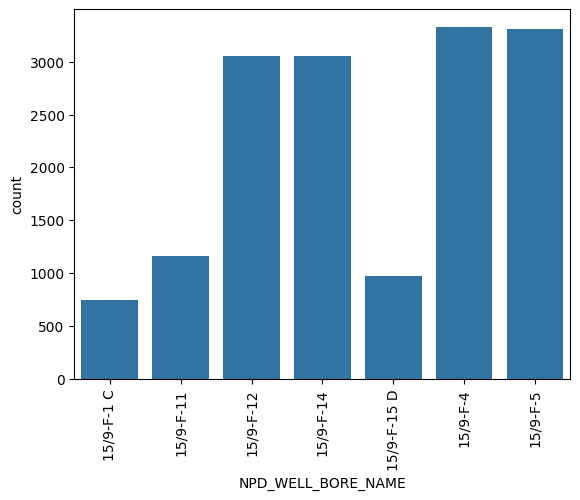

In [11]:
sns.countplot(data=df, x="NPD_WELL_BORE_NAME")
plt.xticks(rotation=90)
plt.show()

In [12]:
df["NPD_WELL_BORE_CODE"].value_counts()

,count
NPD_WELL_BORE_CODE,
5693,3327
5769,3306
5599,3056
5351,3056
7078,1165
7289,978
7405,746


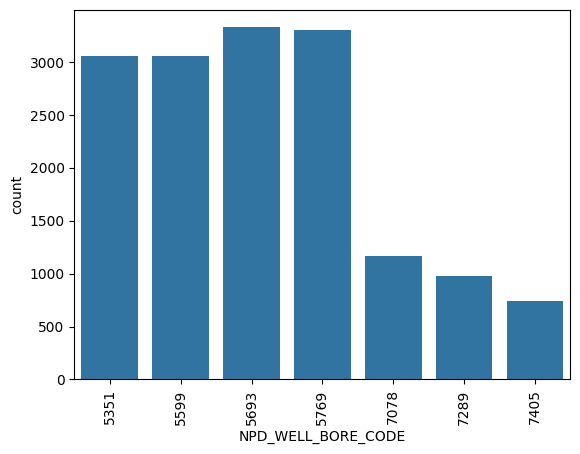

In [13]:
sns.countplot(data=df, x="NPD_WELL_BORE_CODE")
plt.xticks(rotation=90)
plt.show()

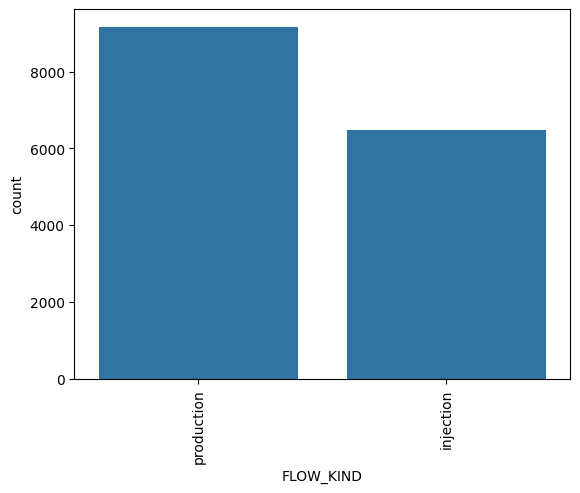

In [14]:
sns.countplot(data=df, x="FLOW_KIND")
plt.xticks(rotation=90)
plt.show()

**Visualize Null Values**

In [15]:
df.isna()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
15630,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
15631,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
15632,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False


In [16]:
df.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,285
AVG_DOWNHOLE_PRESSURE,6654
AVG_DOWNHOLE_TEMPERATURE,6654
AVG_DP_TUBING,6654
AVG_ANNULUS_PRESS,7744
AVG_CHOKE_SIZE_P,6715
AVG_CHOKE_UOM,6473


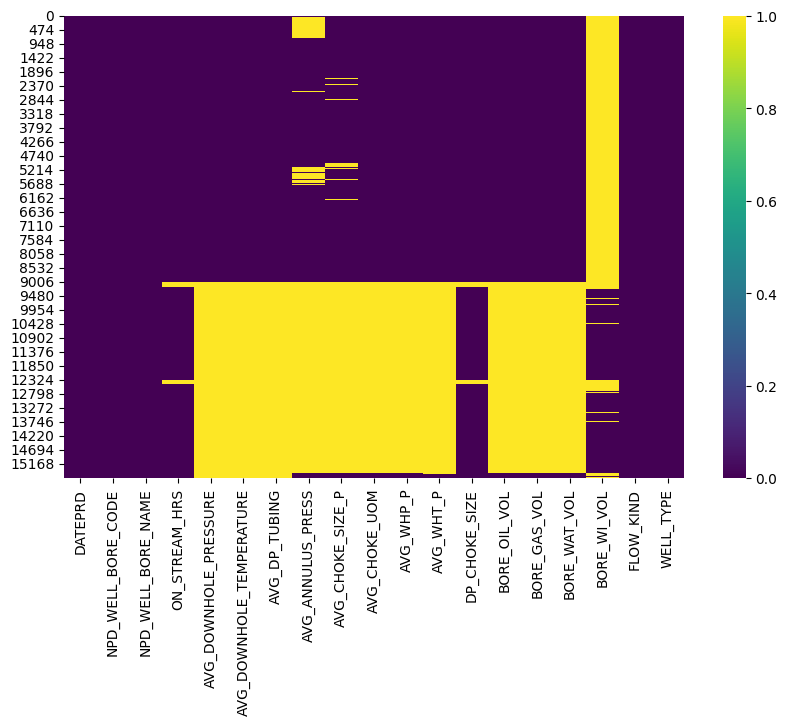

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap="viridis")
plt.show()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

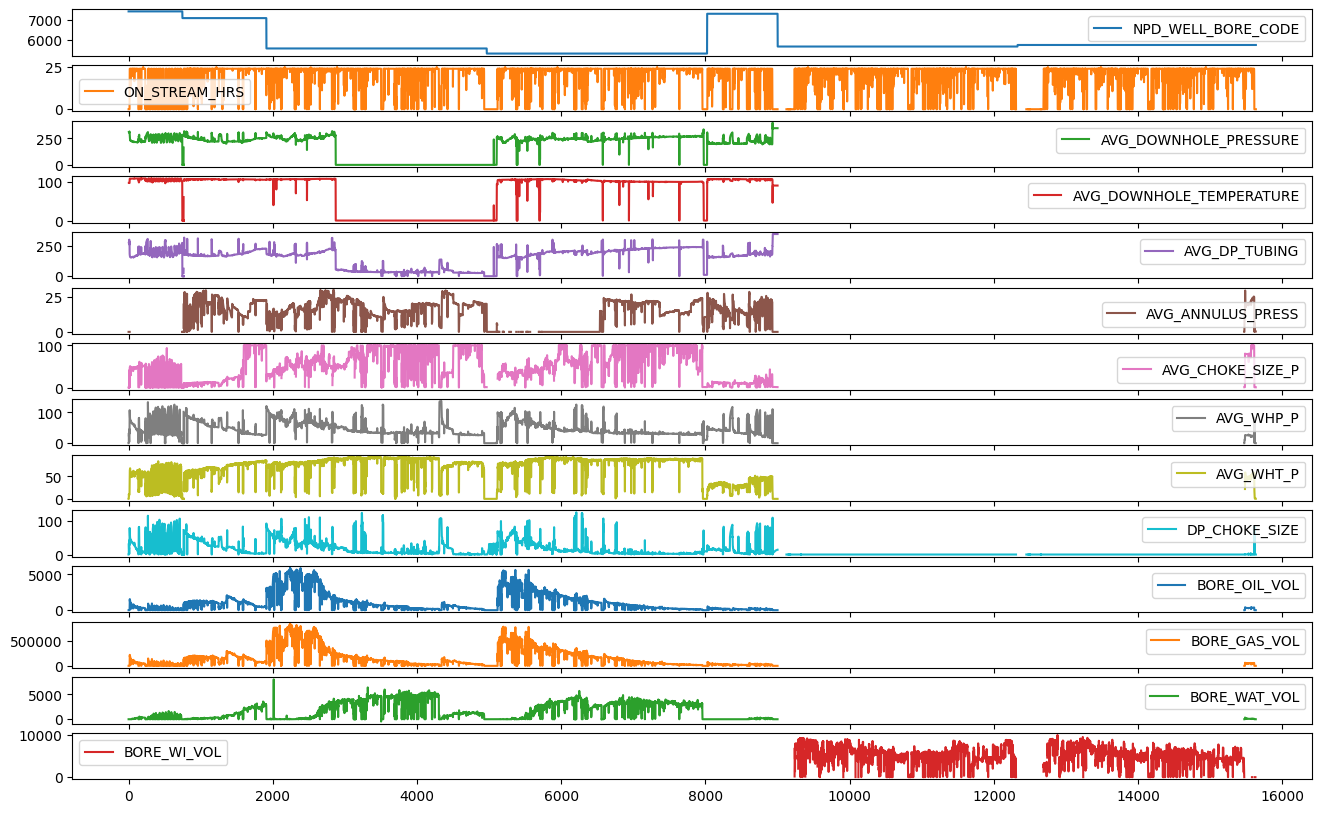

In [18]:
df.plot(subplots=True, figsize=(16, 10))

In [19]:
df["NPD_WELL_BORE_NAME"].value_counts()

,count
NPD_WELL_BORE_NAME,
15/9-F-4,3327
15/9-F-5,3306
15/9-F-12,3056
15/9-F-14,3056
15/9-F-11,1165
15/9-F-15 D,978
15/9-F-1 C,746


## Well 1: F-12

In [20]:
df[df["NPD_WELL_BORE_NAME"] == "15/9-F-12"]

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
1911,12-Feb-08,5599,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,%,106.806,16.295,92.475,285.0,38889.0,385.0,NaN,production,OP
1912,13-Feb-08,5599,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,%,120.889,53.374,89.620,1870.0,285246.0,7.0,NaN,production,OP
1913,14-Feb-08,5599,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,%,113.718,72.738,80.120,3124.0,509955.0,1.0,NaN,production,OP
1914,15-Feb-08,5599,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,%,116.831,69.996,84.251,2608.0,383427.0,1.0,NaN,production,OP
1915,16-Feb-08,5599,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,%,115.434,71.518,82.359,3052.0,418474.0,5.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,13-Sep-16,5599,15/9-F-12,0.00,0.000,0.000,0.000,19.959,0.99291,%,0.000,0.000,0.013,0.0,0.0,0.0,NaN,production,OP
4963,14-Sep-16,5599,15/9-F-12,0.00,0.000,0.000,0.000,19.959,0.97304,%,0.000,0.000,0.016,0.0,0.0,0.0,NaN,production,OP
4964,15-Sep-16,5599,15/9-F-12,0.00,0.000,0.000,0.000,19.959,0.97778,%,0.000,0.000,0.024,0.0,0.0,0.0,NaN,production,OP
4965,16-Sep-16,5599,15/9-F-12,0.00,0.000,0.000,0.000,19.959,0.96101,%,0.000,0.000,0.025,0.0,0.0,0.0,NaN,production,OP


In [21]:
df_well1 = df[df["NPD_WELL_BORE_NAME"] == "15/9-F-12"]

In [22]:
df_well1 = df_well1.reset_index()

In [23]:
df_well1 = df_well1.drop("index",axis=1)

In [24]:
df_well1.head()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,12-Feb-08,5599,15/9-F-12,11.50,308.056,104.418,201.250,18.640,14.48443,%,106.806,16.295,92.475,285.0,38889.0,385.0,NaN,production,OP
1,13-Feb-08,5599,15/9-F-12,24.00,303.034,105.403,182.145,16.467,22.83299,%,120.889,53.374,89.620,1870.0,285246.0,7.0,NaN,production,OP
2,14-Feb-08,5599,15/9-F-12,22.50,295.586,105.775,181.868,12.660,31.24997,%,113.718,72.738,80.120,3124.0,509955.0,1.0,NaN,production,OP
3,15-Feb-08,5599,15/9-F-12,23.15,297.663,105.752,180.832,5.264,28.51893,%,116.831,69.996,84.251,2608.0,383427.0,1.0,NaN,production,OP
4,16-Feb-08,5599,15/9-F-12,24.00,295.936,105.811,180.501,12.385,30.22790,%,115.434,71.518,82.359,3052.0,418474.0,5.0,NaN,production,OP


In [25]:
df_well1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3056 non-null   object 
 1   NPD_WELL_BORE_CODE        3056 non-null   int64  
 2   NPD_WELL_BORE_NAME        3056 non-null   object 
 3   ON_STREAM_HRS             3056 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64
 6   AVG_DP_TUBING             3050 non-null   float64
 7   AVG_ANNULUS_PRESS         3043 non-null   float64
 8   AVG_CHOKE_SIZE_P          3012 non-null   float64
 9   AVG_CHOKE_UOM             3056 non-null   object 
 10  AVG_WHP_P                 3056 non-null   float64
 11  AVG_WHT_P                 3056 non-null   float64
 12  DP_CHOKE_SIZE             3056 non-null   float64
 13  BORE_OIL_VOL              3056 non-null   float64
 14  BORE_GAS

In [26]:
df_well1["DATEPRD"] = pd.to_datetime(df_well1["DATEPRD"])

In [27]:
df_well1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   3056 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        3056 non-null   int64         
 2   NPD_WELL_BORE_NAME        3056 non-null   object        
 3   ON_STREAM_HRS             3056 non-null   float64       
 4   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64       
 5   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64       
 6   AVG_DP_TUBING             3050 non-null   float64       
 7   AVG_ANNULUS_PRESS         3043 non-null   float64       
 8   AVG_CHOKE_SIZE_P          3012 non-null   float64       
 9   AVG_CHOKE_UOM             3056 non-null   object        
 10  AVG_WHP_P                 3056 non-null   float64       
 11  AVG_WHT_P                 3056 non-null   float64       
 12  DP_CHOKE_SIZE       

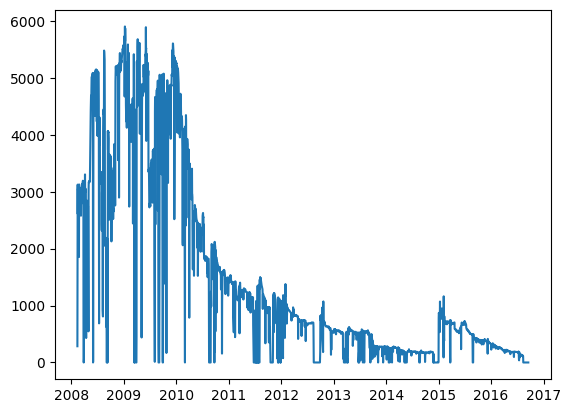

In [28]:
plt.plot(df_well1["DATEPRD"], df_well1["BORE_OIL_VOL"])

<Axes: >

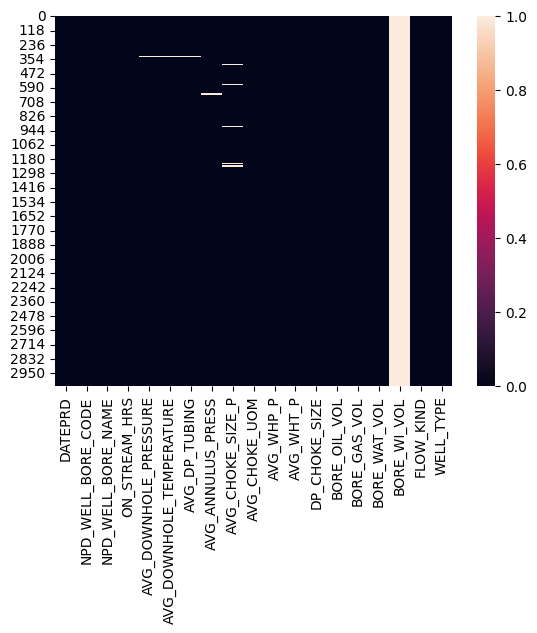

In [29]:
sns.heatmap(df_well1.isna())

In [30]:
df_well1.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,6
AVG_DOWNHOLE_TEMPERATURE,6
AVG_DP_TUBING,6
AVG_ANNULUS_PRESS,13
AVG_CHOKE_SIZE_P,44
AVG_CHOKE_UOM,0


In [31]:
df_well1 = df_well1.drop("BORE_WI_VOL", axis=1)

In [32]:
df_well1[df_well1.isnull().any(axis=1)]

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
44,2008-03-27,5599,15/9-F-12,0.0,283.710,104.030,282.532,0.603,NaN,%,1.178,6.731,1.164,0.0,0.0,0.0,production,OP
202,2008-09-03,5599,15/9-F-12,0.0,276.507,104.463,169.724,1.742,NaN,%,106.783,18.169,75.044,0.0,0.0,0.0,production,OP
203,2008-09-04,5599,15/9-F-12,0.0,276.818,104.161,172.181,1.187,NaN,%,104.637,14.348,80.955,0.0,0.0,0.0,production,OP
204,2008-09-05,5599,15/9-F-12,0.0,277.098,103.975,172.610,0.948,NaN,%,104.488,15.508,83.341,0.0,0.0,0.0,production,OP
208,2008-09-09,5599,15/9-F-12,0.0,277.312,104.191,170.390,1.305,NaN,%,106.922,19.209,106.810,0.0,0.0,0.0,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2011-07-27,5599,15/9-F-12,0.0,0.000,0.000,95.244,0.104,NaN,%,95.244,33.009,72.224,0.0,0.0,0.0,production,OP
1239,2011-07-31,5599,15/9-F-12,0.0,0.000,0.000,95.311,0.000,NaN,%,95.311,18.148,95.311,0.0,0.0,0.0,production,OP
1240,2011-08-01,5599,15/9-F-12,0.0,0.000,0.000,95.527,0.000,NaN,%,95.527,13.884,95.527,0.0,0.0,0.0,production,OP
1241,2011-08-02,5599,15/9-F-12,0.0,0.000,0.000,96.618,0.000,NaN,%,96.618,14.207,96.618,0.0,0.0,0.0,production,OP


In [33]:
df_well1.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,6
AVG_DOWNHOLE_TEMPERATURE,6
AVG_DP_TUBING,6
AVG_ANNULUS_PRESS,13
AVG_CHOKE_SIZE_P,44
AVG_CHOKE_UOM,0


In [34]:
df_well1[df_well1['AVG_DOWNHOLE_PRESSURE'].isna()]

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
328,2009-01-07,5599,15/9-F-12,24.0,NaN,NaN,NaN,18.310,61.22542,%,72.045,80.325,38.244,5622.0,834503.0,26.0,production,OP
329,2009-01-08,5599,15/9-F-12,24.0,NaN,NaN,NaN,18.887,65.33767,%,68.489,80.225,34.512,5902.0,851132.0,15.0,production,OP
330,2009-01-09,5599,15/9-F-12,24.0,NaN,NaN,NaN,18.837,62.67664,%,71.645,79.659,37.667,5644.0,810727.0,14.0,production,OP
331,2009-01-10,5599,15/9-F-12,24.0,NaN,NaN,NaN,18.922,64.08093,%,70.184,77.890,36.254,5870.0,844193.0,16.0,production,OP
332,2009-01-11,5599,15/9-F-12,24.0,NaN,NaN,NaN,18.864,60.46817,%,73.300,77.529,39.550,5717.0,822490.0,15.0,production,OP
333,2009-01-12,5599,15/9-F-12,24.0,NaN,NaN,NaN,18.898,56.38311,%,77.676,77.703,44.193,5458.0,784575.0,15.0,production,OP


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

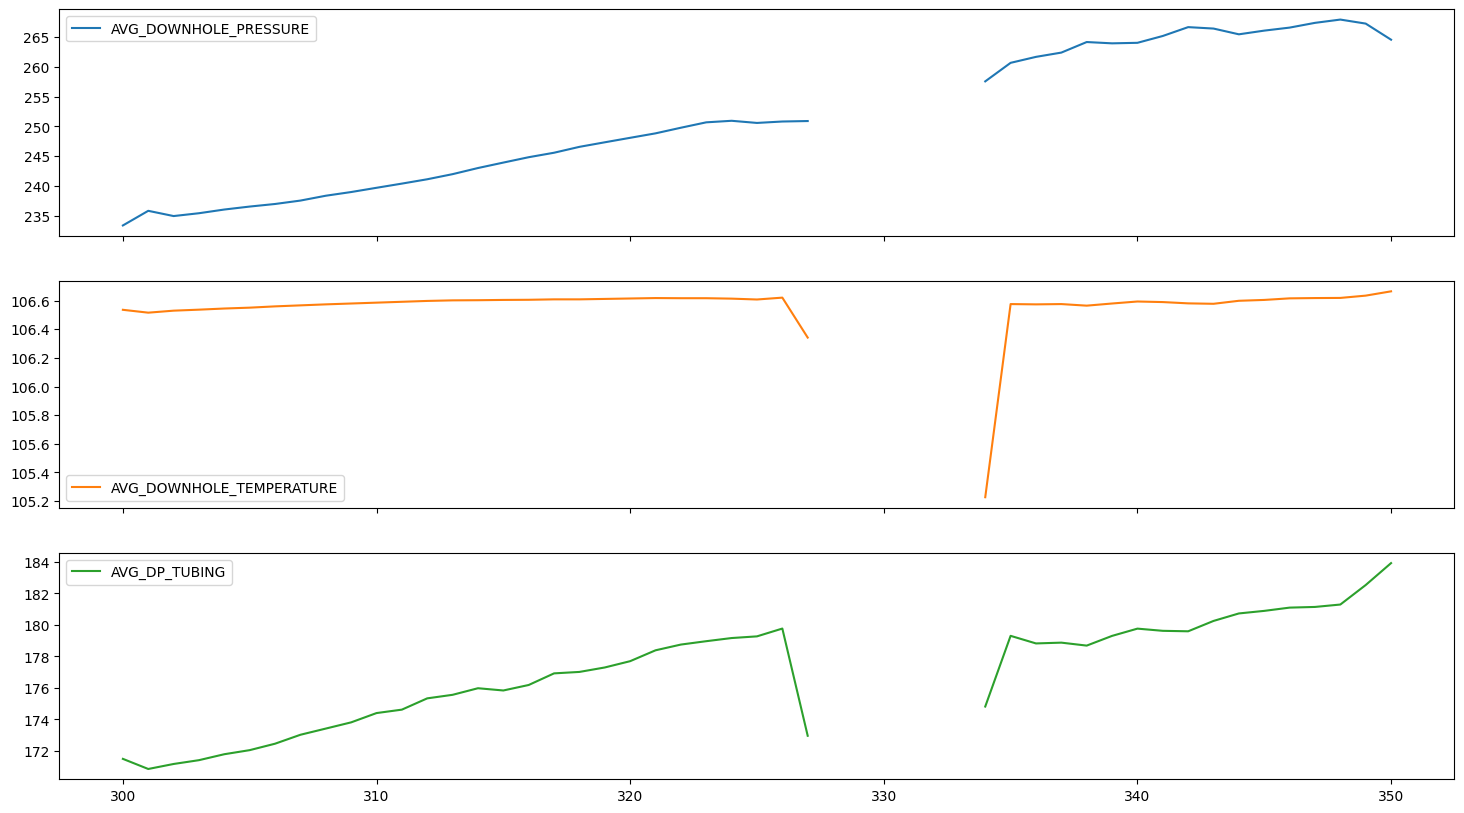

In [35]:
df_well1[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING']].loc[300:350].plot(subplots=True, figsize=(18, 10))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

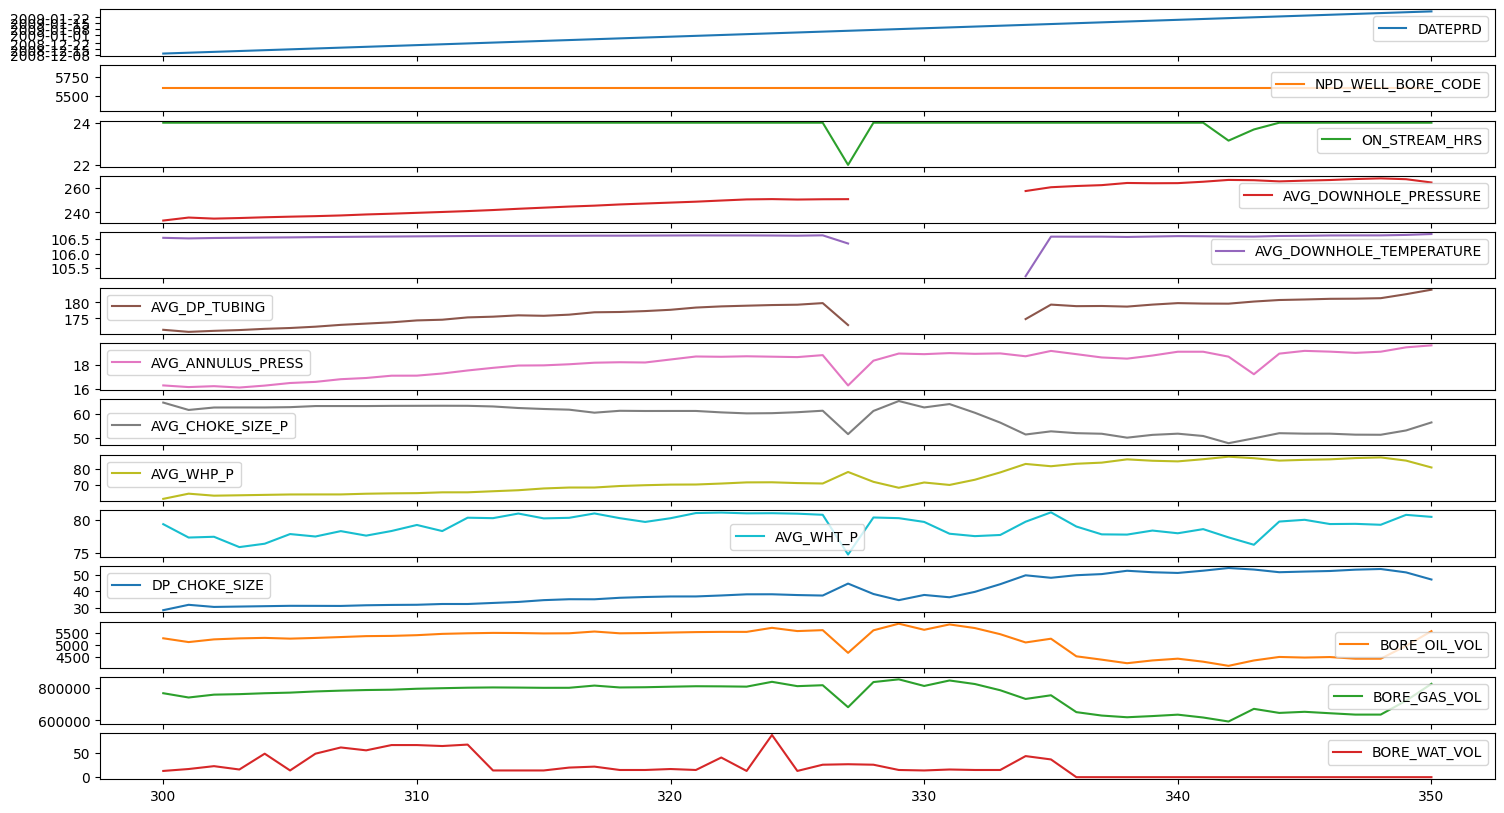

In [36]:
df_well1.loc[300:350].plot(subplots=True, figsize=(18, 10))

array([<Axes: >], dtype=object)

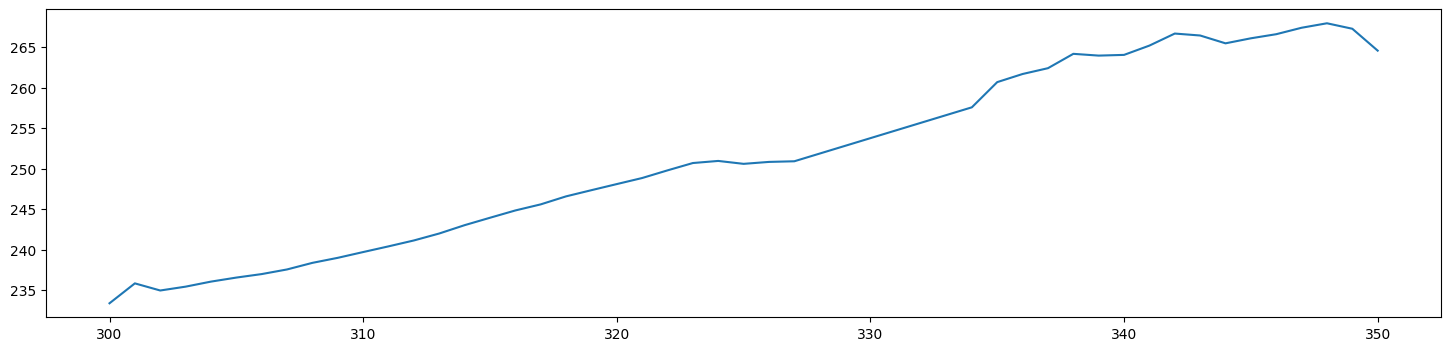

In [37]:
df_well1['AVG_DOWNHOLE_PRESSURE'].interpolate(method='linear').loc[300:350].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

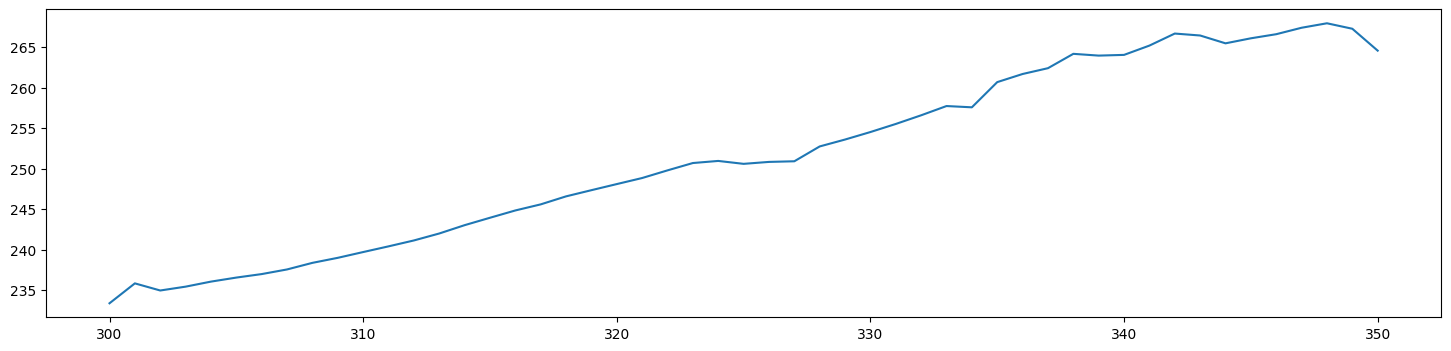

In [38]:
df_well1['AVG_DOWNHOLE_PRESSURE'].interpolate(method='spline', order=2).loc[300:350].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

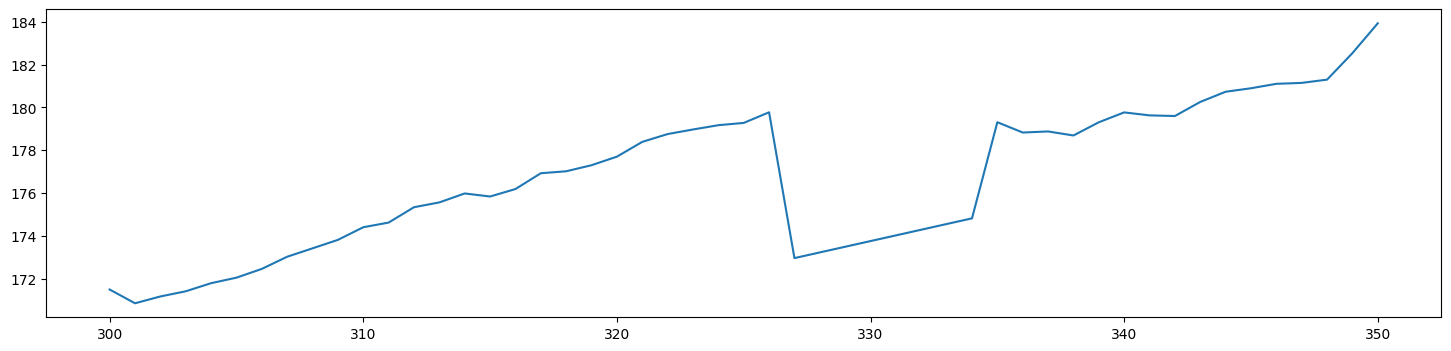

In [39]:
df_well1['AVG_DP_TUBING'].interpolate(method='linear').loc[300:350].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

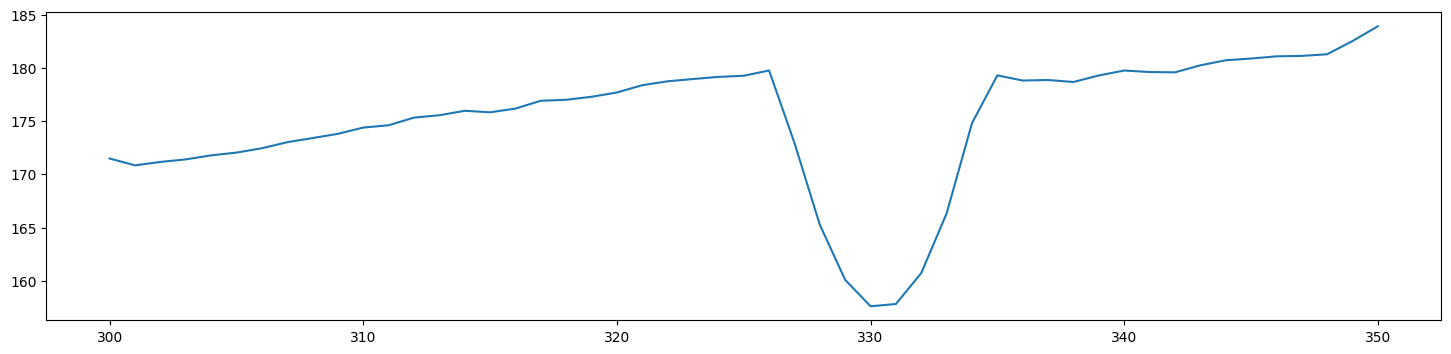

In [40]:
df_well1['AVG_DP_TUBING'].interpolate(method='spline', order=2).loc[300:350].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

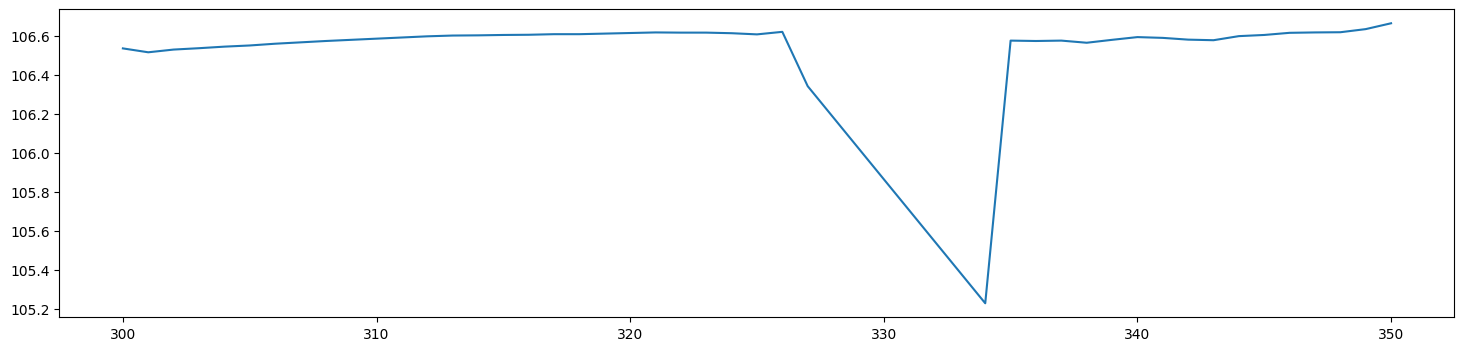

In [41]:
df_well1['AVG_DOWNHOLE_TEMPERATURE'].interpolate(method='linear').loc[300:350].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

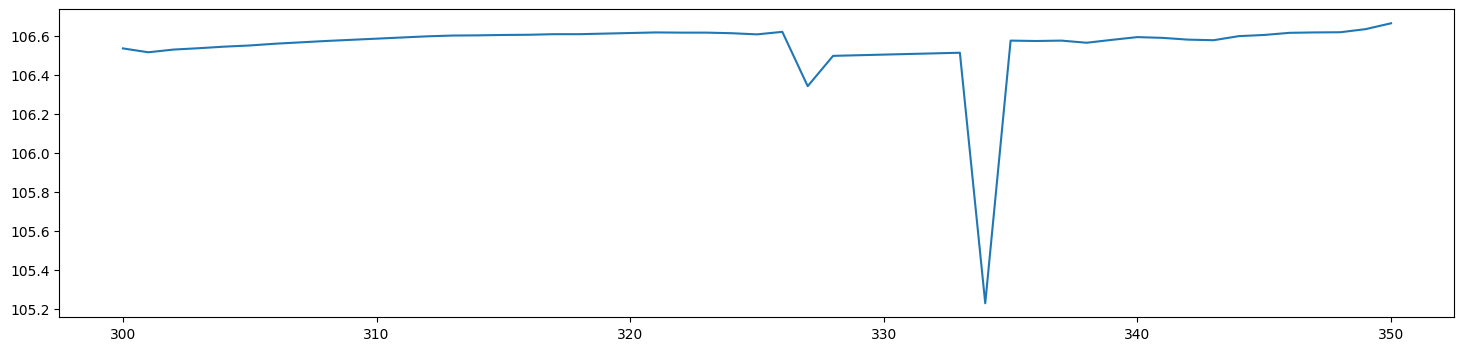

In [42]:
df_well1['AVG_DOWNHOLE_TEMPERATURE'].interpolate(method='spline', order=2).loc[300:350].plot(subplots=True, figsize=(18, 4))

In [43]:
df_well1['AVG_DOWNHOLE_PRESSURE'] = df_well1['AVG_DOWNHOLE_PRESSURE'].interpolate(method='linear')
df_well1['AVG_DP_TUBING'] = df_well1['AVG_DP_TUBING'].interpolate(method='spline', order=2)
df_well1['AVG_DOWNHOLE_TEMPERATURE'] = df_well1['AVG_DOWNHOLE_TEMPERATURE'].interpolate(method='spline', order=2)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

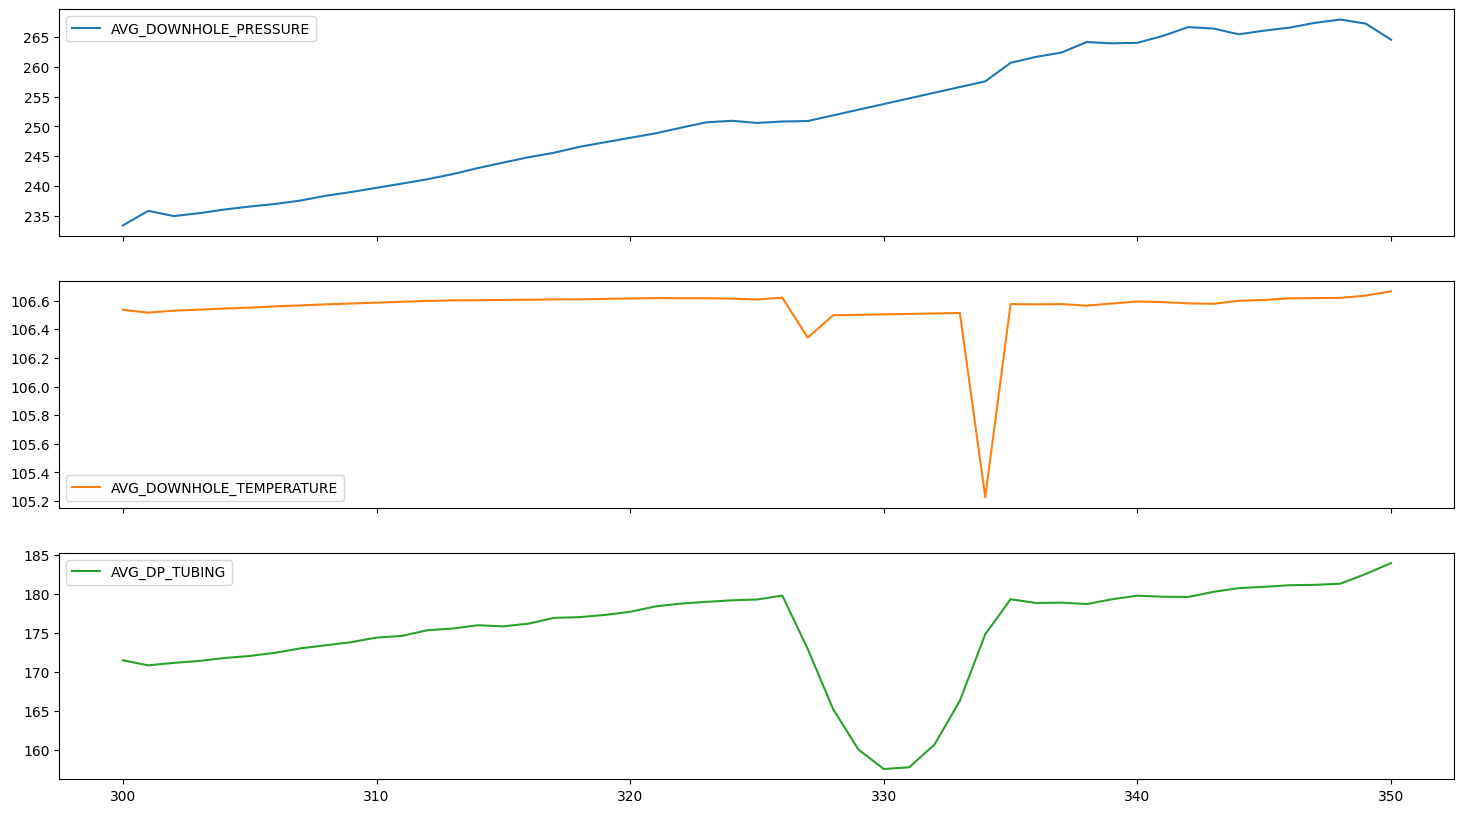

In [44]:
df_well1[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING']].loc[300:350].plot(subplots=True, figsize=(18, 10))

In [45]:
df_well1.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,13
AVG_CHOKE_SIZE_P,44
AVG_CHOKE_UOM,0


In [46]:
df_well1[df_well1['AVG_CHOKE_SIZE_P'].isna()]

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
44,2008-03-27,5599,15/9-F-12,0.0,283.710,104.030,282.532,0.603,NaN,%,1.178,6.731,1.164,0.0,0.0,0.0,production,OP
202,2008-09-03,5599,15/9-F-12,0.0,276.507,104.463,169.724,1.742,NaN,%,106.783,18.169,75.044,0.0,0.0,0.0,production,OP
203,2008-09-04,5599,15/9-F-12,0.0,276.818,104.161,172.181,1.187,NaN,%,104.637,14.348,80.955,0.0,0.0,0.0,production,OP
204,2008-09-05,5599,15/9-F-12,0.0,277.098,103.975,172.610,0.948,NaN,%,104.488,15.508,83.341,0.0,0.0,0.0,production,OP
208,2008-09-09,5599,15/9-F-12,0.0,277.312,104.191,170.390,1.305,NaN,%,106.922,19.209,106.810,0.0,0.0,0.0,production,OP
394,2009-03-14,5599,15/9-F-12,0.0,299.454,105.184,261.307,1.787,NaN,%,38.148,13.141,38.139,0.0,0.0,0.0,production,OP
397,2009-03-17,5599,15/9-F-12,0.0,294.899,104.777,259.544,1.040,NaN,%,35.354,17.091,28.120,0.0,0.0,0.0,production,OP
406,2009-03-26,5599,15/9-F-12,0.0,279.237,104.784,266.844,1.040,NaN,%,12.393,5.910,11.702,0.0,0.0,0.0,production,OP
407,2009-03-27,5599,15/9-F-12,0.0,279.612,104.496,261.180,0.677,NaN,%,18.431,5.713,18.044,0.0,0.0,0.0,production,OP
408,2009-03-28,5599,15/9-F-12,0.0,279.901,104.325,208.875,0.519,NaN,%,71.026,5.502,70.959,0.0,0.0,0.0,production,OP


array([<Axes: >], dtype=object)

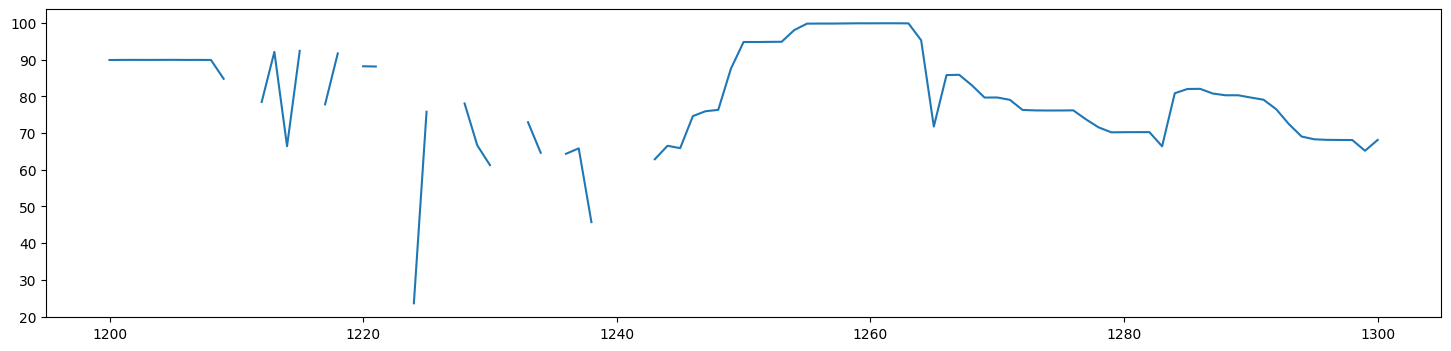

In [47]:
df_well1['AVG_CHOKE_SIZE_P'].loc[1200:1300].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

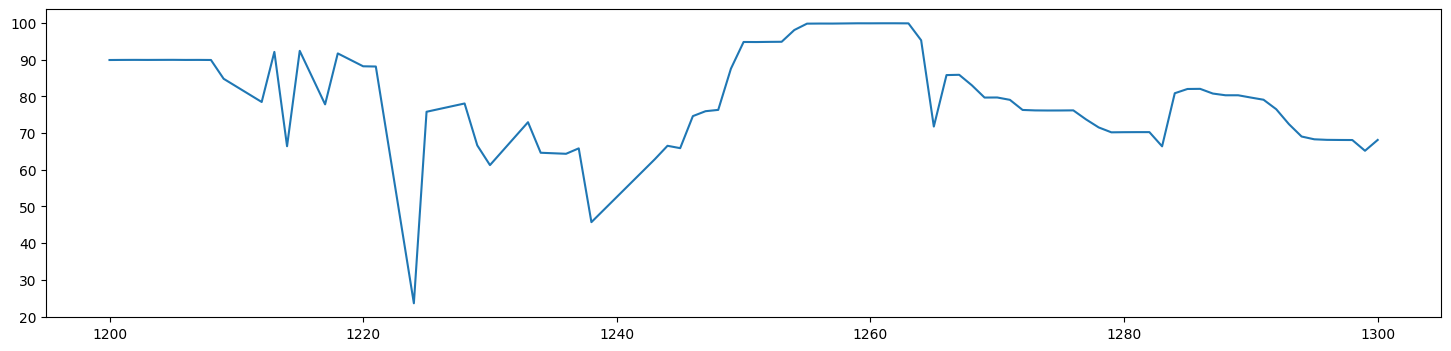

In [48]:
df_well1['AVG_CHOKE_SIZE_P'].interpolate(method='linear').loc[1200:1300].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

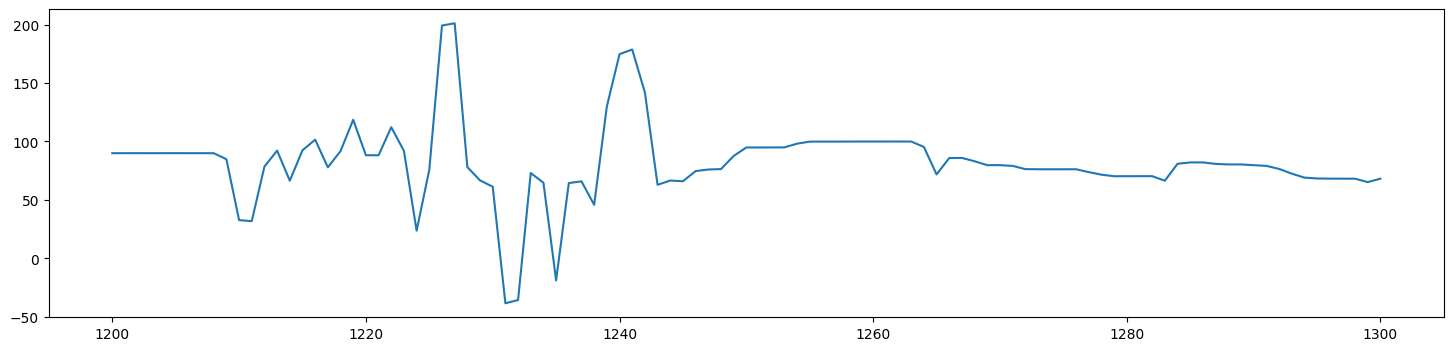

In [49]:
df_well1['AVG_CHOKE_SIZE_P'].interpolate(method='spline', order=2).loc[1200:1300].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

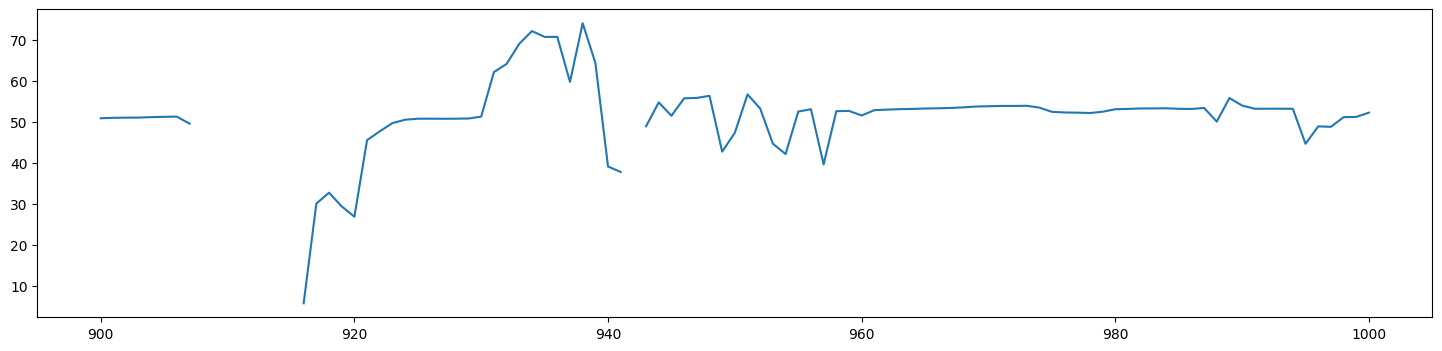

In [50]:
df_well1['AVG_CHOKE_SIZE_P'].loc[900:1000].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

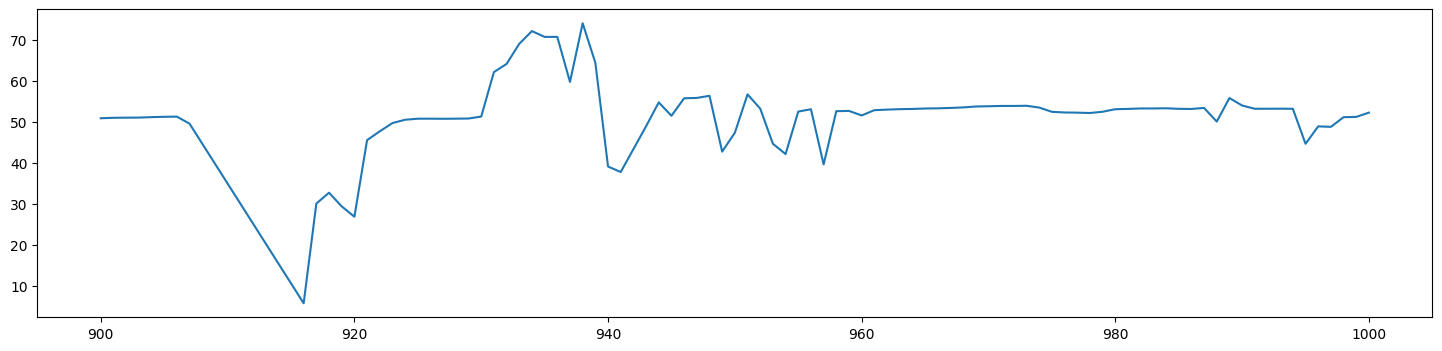

In [51]:
df_well1['AVG_CHOKE_SIZE_P'].interpolate(method='linear').loc[900:1000].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

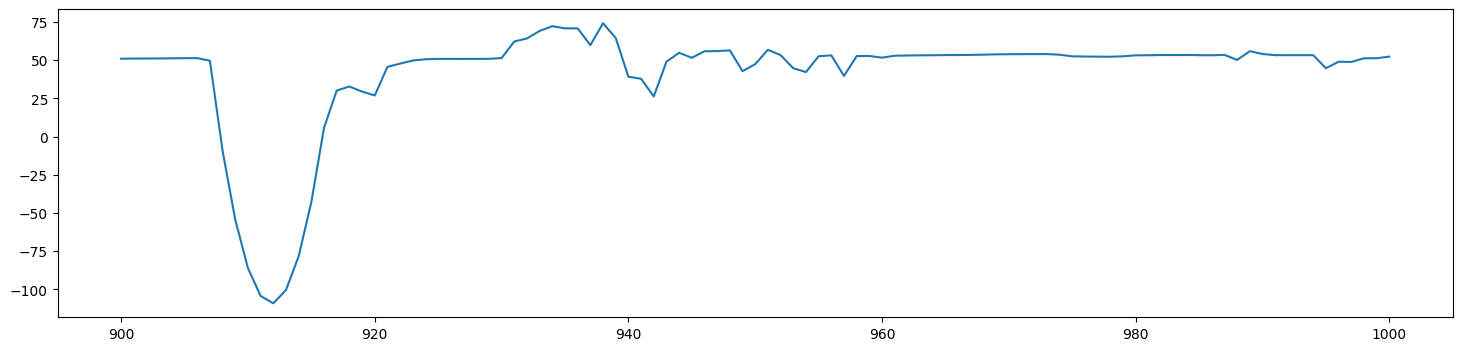

In [52]:
df_well1['AVG_CHOKE_SIZE_P'].interpolate(method='spline', order=2).loc[900:1000].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

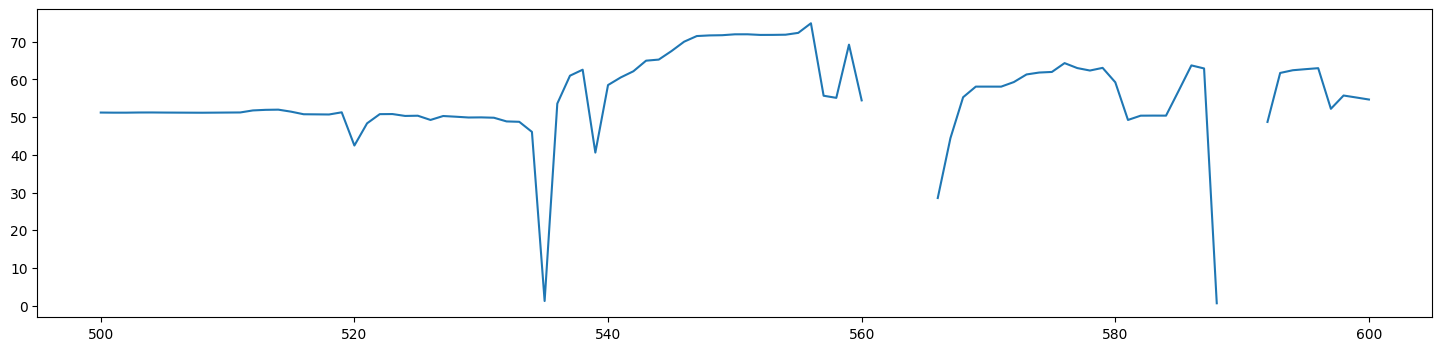

In [53]:
df_well1['AVG_CHOKE_SIZE_P'].loc[500:600].plot(subplots=True, figsize=(18, 4))

array([<Axes: >], dtype=object)

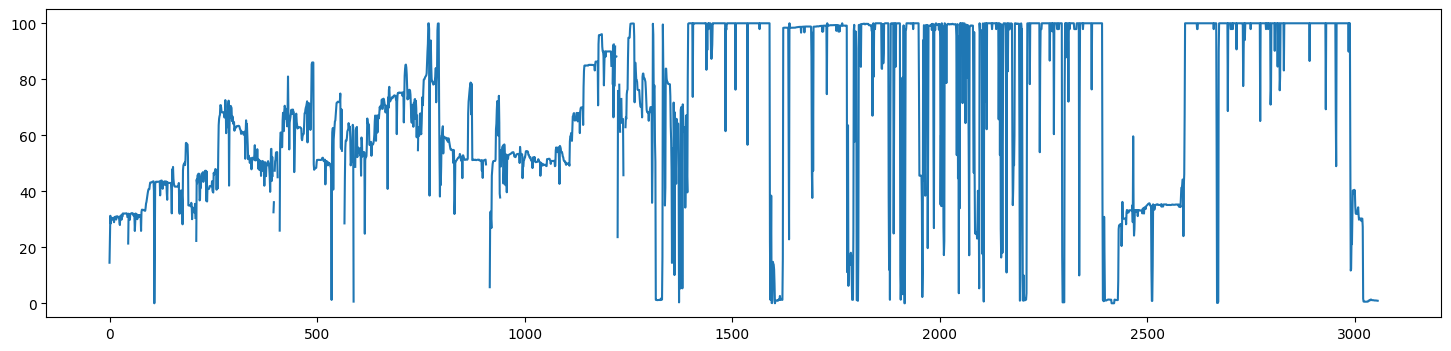

In [54]:
df_well1['AVG_CHOKE_SIZE_P'].plot(subplots=True, figsize=(18, 4))

In [55]:
df_well1['AVG_CHOKE_SIZE_P'] = df_well1['AVG_CHOKE_SIZE_P'].interpolate(method='spline', order=3)

In [56]:
df_well1.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,13
AVG_CHOKE_SIZE_P,0
AVG_CHOKE_UOM,0


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

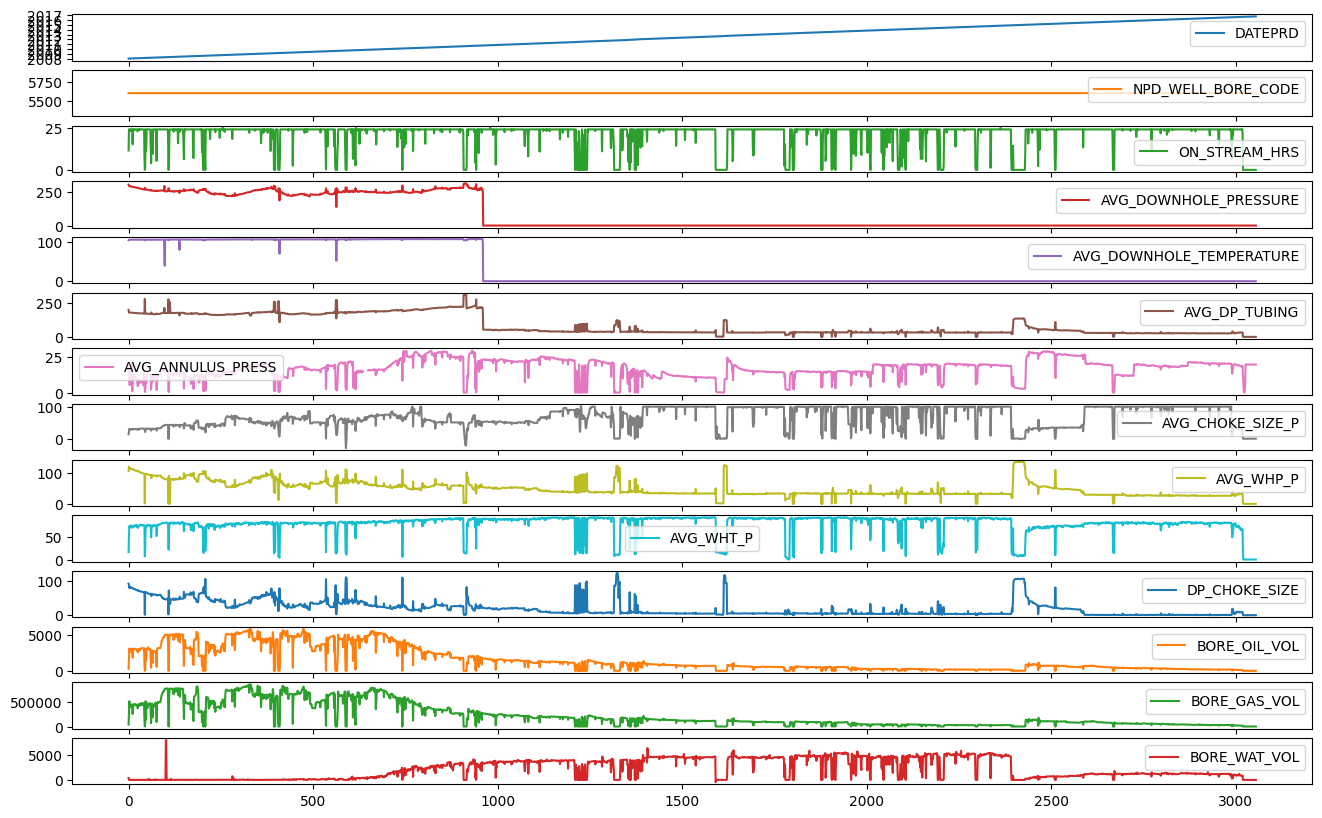

In [57]:
df_well1.plot(subplots=True, figsize=(16, 10))

In [58]:
df_well1[df_well1['AVG_ANNULUS_PRESS'].isna()]

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND,WELL_TYPE
636,2009-11-14,5599,15/9-F-12,24.00,258.063,106.884,185.718,NaN,57.36473,%,72.345,81.250,39.632,4413.0,620426.0,411.0,production,OP
637,2009-11-15,5599,15/9-F-12,24.00,257.395,106.895,186.141,NaN,58.30999,%,71.254,81.533,38.507,4447.0,626210.0,435.0,production,OP
638,2009-11-16,5599,15/9-F-12,24.00,256.242,106.915,186.785,NaN,60.35525,%,69.457,81.615,36.538,4517.0,636383.0,394.0,production,OP
639,2009-11-17,5599,15/9-F-12,24.00,254.036,106.953,188.251,NaN,64.94339,%,65.785,81.356,32.393,4725.0,666975.0,264.0,production,OP
640,2009-11-18,5599,15/9-F-12,24.00,253.018,106.978,189.073,NaN,67.05462,%,63.945,82.479,30.453,4875.0,687647.0,399.0,production,OP
641,2009-11-19,5599,15/9-F-12,24.00,253.252,106.979,188.729,NaN,66.70750,%,64.523,81.183,31.081,4842.0,684781.0,385.0,production,OP
642,2009-11-20,5599,15/9-F-12,23.00,258.435,106.920,187.480,NaN,58.02438,%,70.956,78.438,37.860,4005.0,564352.0,331.0,production,OP
643,2009-11-21,5599,15/9-F-12,24.00,253.368,106.981,188.952,NaN,66.73044,%,64.416,82.191,30.974,4847.0,685493.0,401.0,production,OP
644,2009-11-22,5599,15/9-F-12,24.00,253.086,106.985,188.869,NaN,67.05327,%,64.217,81.627,30.755,4841.0,683921.0,380.0,production,OP
645,2009-11-23,5599,15/9-F-12,21.50,256.618,106.937,187.886,NaN,60.94299,%,68.732,80.557,35.494,3930.0,556602.0,315.0,production,OP


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

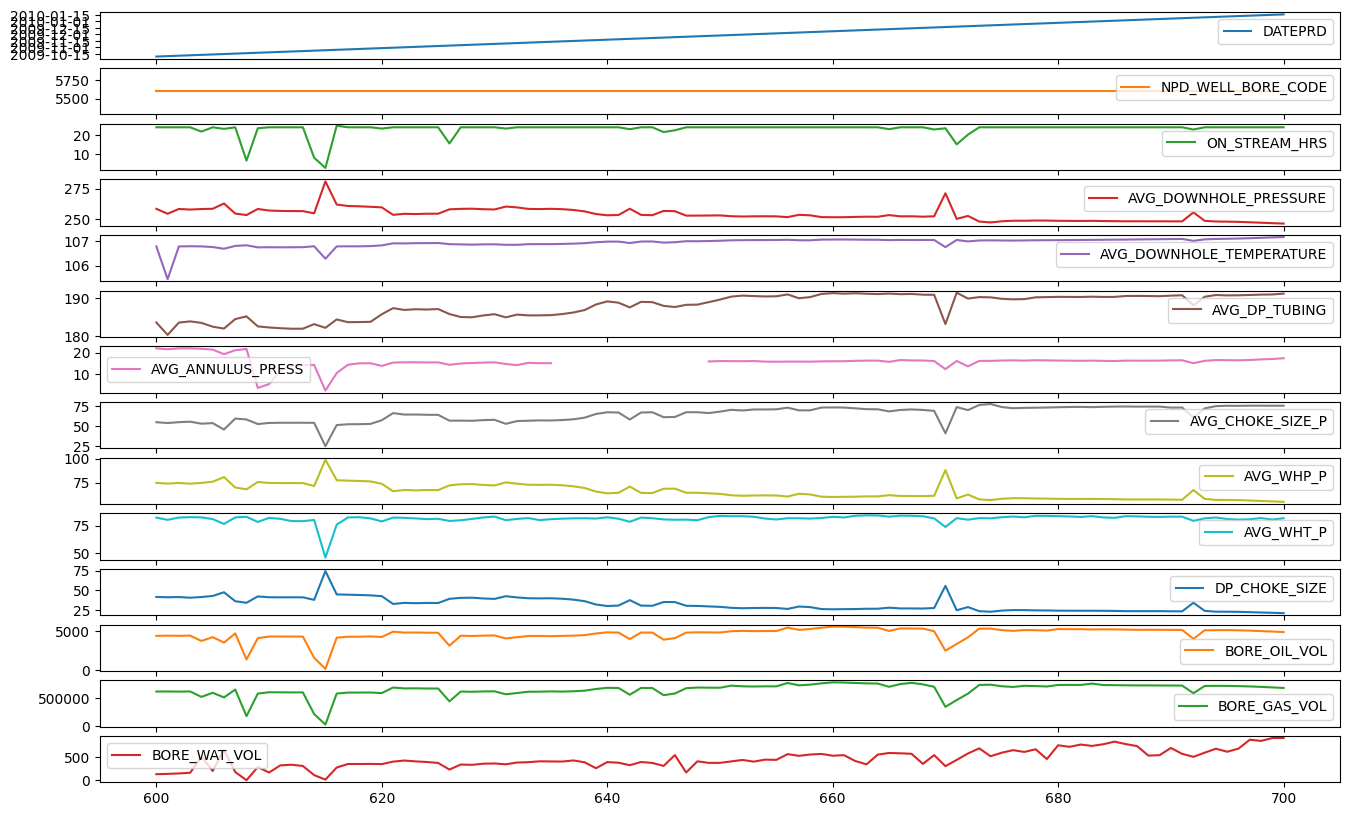

In [59]:
df_well1.loc[600:700].plot(subplots=True, figsize=(16, 10))

In [60]:
df_well1[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL']].loc[600:700].corr()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL
ON_STREAM_HRS,1.000000,-0.352865,0.266084,0.227260,0.223978,0.374562,-0.324150,0.578904,-0.358688,0.827710,0.829904
AVG_DOWNHOLE_PRESSURE,-0.352865,1.000000,-0.607688,-0.770511,-0.391818,-0.951595,0.968235,-0.686768,0.974550,-0.721056,-0.712124
AVG_DOWNHOLE_TEMPERATURE,0.266084,-0.607688,1.000000,0.782260,0.083132,0.722945,-0.711567,0.446402,-0.713359,0.524342,0.523968
AVG_DP_TUBING,0.227260,-0.770511,0.782260,1.000000,0.165150,0.915135,-0.905418,0.393204,-0.886188,0.648000,0.649152
AVG_ANNULUS_PRESS,0.223978,-0.391818,0.083132,0.165150,1.000000,0.313148,-0.325101,0.550474,-0.352754,0.287332,0.280261
AVG_CHOKE_SIZE_P,0.374562,-0.951595,0.722945,0.915135,0.313148,1.000000,-0.992729,0.615371,-0.989982,0.775510,0.769521
AVG_WHP_P,-0.324150,0.968235,-0.711567,-0.905418,-0.325101,-0.992729,1.000000,-0.611620,0.996662,-0.734404,-0.728908
AVG_WHT_P,0.578904,-0.686768,0.446402,0.393204,0.550474,0.615371,-0.611620,1.000000,-0.662296,0.677045,0.668685
DP_CHOKE_SIZE,-0.358688,0.974550,-0.713359,-0.886188,-0.352754,-0.989982,0.996662,-0.662296,1.000000,-0.749026,-0.743474
BORE_OIL_VOL,0.827710,-0.721056,0.524342,0.648000,0.287332,0.775510,-0.734404,0.677045,-0.749026,1.000000,0.998408


<Axes: >

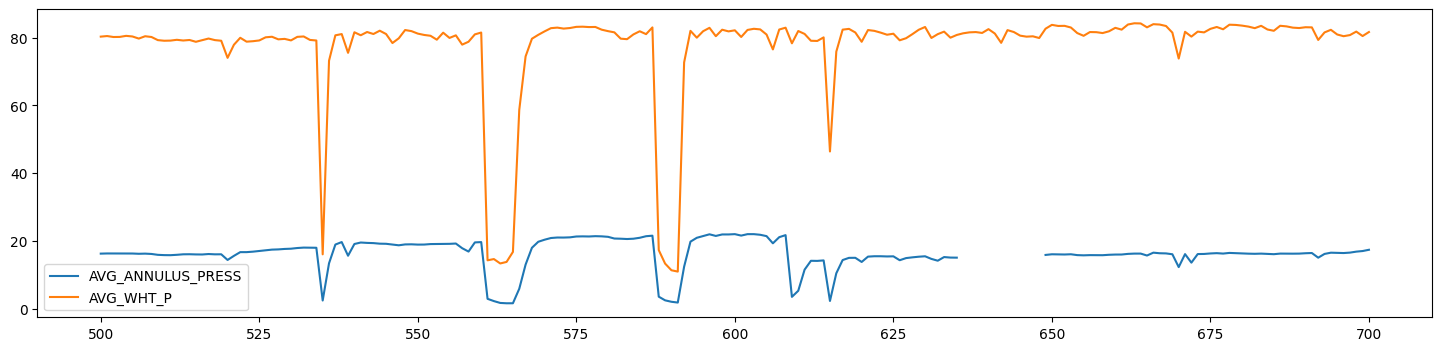

In [61]:
df_well1[['AVG_ANNULUS_PRESS', 'AVG_WHT_P']].loc[500:700].plot(figsize=(18, 4))

In [62]:
dif = df_well1.loc[635]['AVG_WHT_P'] - df_well1.loc[635]['AVG_ANNULUS_PRESS']

In [63]:
dif

np.float64(65.687)

In [64]:
df_well1['AVG_ANNULUS_PRESS'] = np.where(df_well1['AVG_ANNULUS_PRESS'].isna(), df_well1['AVG_WHT_P'] - dif, df_well1['AVG_ANNULUS_PRESS'])

<Axes: >

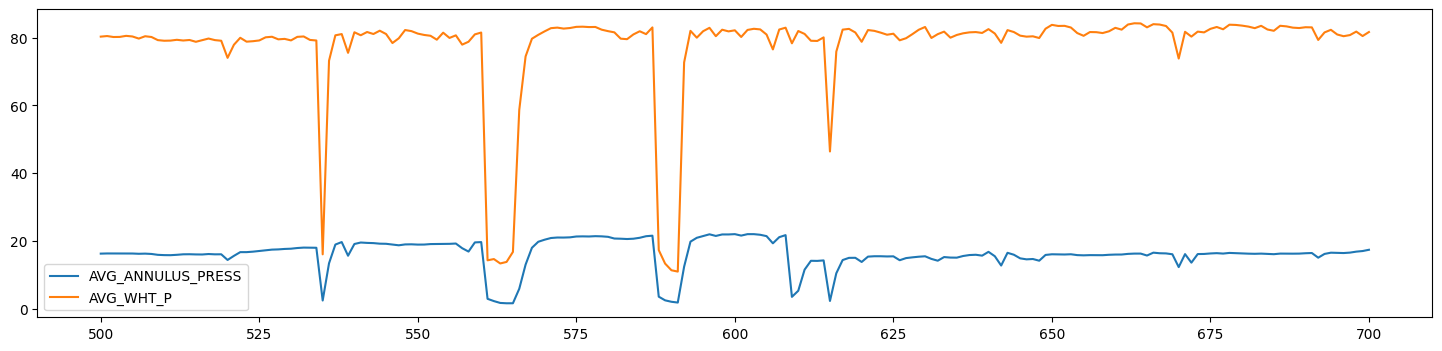

In [65]:
df_well1[['AVG_ANNULUS_PRESS', 'AVG_WHT_P']].loc[500:700].plot(figsize=(18, 4))

In [66]:
df_well1.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_CHOKE_UOM,0


# Quick Investigation of Other Wells

In [67]:
def dataformat(df, wellbore_name):
  """
  Function for getting data for a specific wellbore from the master dataframe

  Inputs ->
  df: master dataframe
  wellbore_name: name of the wellbore

  Outputs ->
  df_well: dataframe for the specific wellbore

  """
  df_well = df[df["NPD_WELL_BORE_NAME"] == wellbore_name]
  df_well = df_well.reset_index()
  df_well = df_well.drop("index",axis=1)
  df_well["DATEPRD"] = pd.to_datetime(df_well["DATEPRD"])

  return df_well

In [68]:
df_well2 = dataformat(df, "15/9-F-14")

In [69]:
df_well2

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2008-02-12,5351,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,%,0.000,0.0,0.059,0.0,0.0,0.0,NaN,production,OP
1,2008-02-13,5351,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,%,0.000,0.0,0.068,0.0,0.0,0.0,NaN,production,OP
2,2008-02-14,5351,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,%,0.000,0.0,0.050,0.0,0.0,0.0,NaN,production,OP
3,2008-02-15,5351,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,%,0.000,0.0,0.066,0.0,0.0,0.0,NaN,production,OP
4,2008-02-16,5351,15/9-F-14,0.0,0.0,0.0,0.000,0.000,NaN,%,0.000,0.0,0.105,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,5351,15/9-F-14,0.0,0.0,0.0,10.873,10.583,0.94937,%,10.873,0.0,8.894,0.0,0.0,0.0,NaN,production,OP
3052,2016-09-14,5351,15/9-F-14,0.0,0.0,0.0,10.877,10.583,1.11452,%,10.877,0.0,8.888,0.0,0.0,0.0,NaN,production,OP
3053,2016-09-15,5351,15/9-F-14,0.0,0.0,0.0,10.883,10.582,1.00047,%,10.883,0.0,8.856,0.0,0.0,0.0,NaN,production,OP
3054,2016-09-16,5351,15/9-F-14,0.0,0.0,0.0,10.879,10.583,1.16066,%,10.879,0.0,8.839,0.0,0.0,0.0,NaN,production,OP


<Axes: >

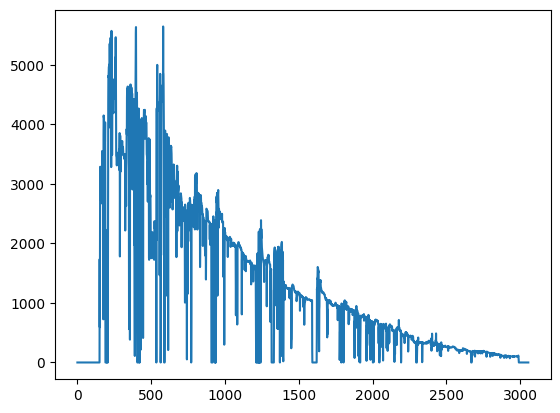

In [70]:
df_well2['BORE_OIL_VOL'].plot()

<Axes: >

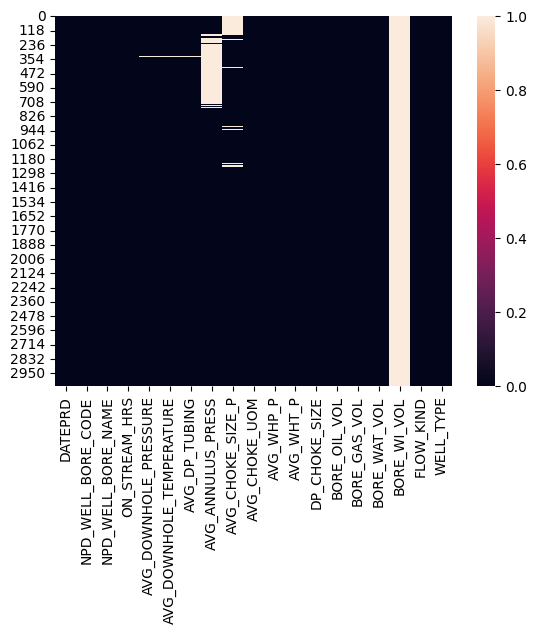

In [71]:
sns.heatmap(df_well2.isna())

In [72]:
df_well2.isna().sum()

,0
DATEPRD,0
NPD_WELL_BORE_CODE,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,6
AVG_DOWNHOLE_TEMPERATURE,6
AVG_DP_TUBING,6
AVG_ANNULUS_PRESS,523
AVG_CHOKE_SIZE_P,196
AVG_CHOKE_UOM,0


array([<Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>,
       <Axes: xlabel='DATEPRD'>, <Axes: xlabel='DATEPRD'>], dtype=object)

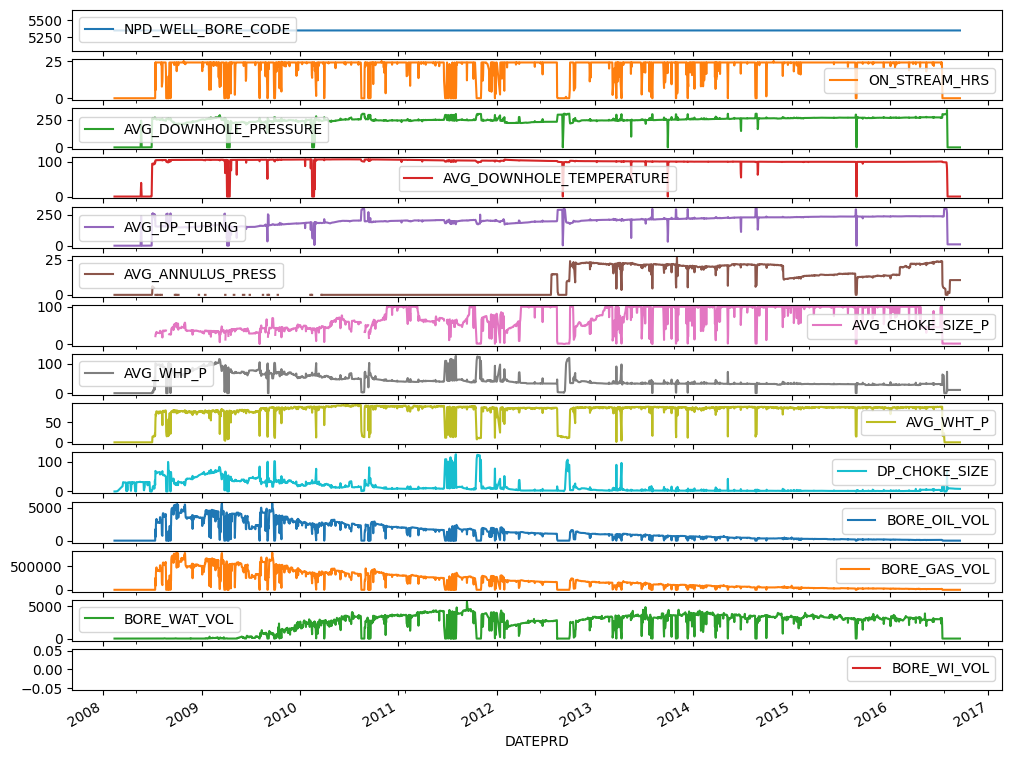

In [73]:
df_well2.set_index('DATEPRD').plot(subplots=True, figsize=(12, 10))

In [74]:
df_well2[df_well2['AVG_ANNULUS_PRESS'].isna()]

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
147,2008-07-09,5351,15/9-F-14,0.0,266.396,93.461,230.790,NaN,NaN,%,35.606,15.049,9.470,0.0,0.0,0.0,NaN,production,OP
149,2008-07-11,5351,15/9-F-14,0.0,266.364,99.407,212.621,NaN,NaN,%,53.743,21.563,36.475,0.0,0.0,0.0,NaN,production,OP
150,2008-07-12,5351,15/9-F-14,0.0,267.681,96.168,245.908,NaN,NaN,%,21.773,17.068,21.676,0.0,0.0,0.0,NaN,production,OP
156,2008-07-18,5351,15/9-F-14,24.0,251.502,104.334,155.279,NaN,30.05159,%,96.223,75.750,64.305,2780.0,410360.0,11.0,NaN,production,OP
157,2008-07-19,5351,15/9-F-14,24.0,251.509,104.354,155.360,NaN,30.08393,%,96.149,75.335,64.164,2774.0,420865.0,6.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,2010-03-16,5351,15/9-F-14,24.0,243.615,106.318,185.099,NaN,42.54006,%,58.515,89.640,25.697,2444.0,346537.0,2515.0,NaN,production,OP
757,2010-03-18,5351,15/9-F-14,24.0,243.129,106.298,185.232,NaN,42.64225,%,57.897,88.239,25.015,2303.0,336307.0,2356.0,NaN,production,OP
758,2010-03-19,5351,15/9-F-14,24.0,242.345,106.287,184.855,NaN,42.67783,%,57.490,87.250,24.345,2275.0,318026.0,2039.0,NaN,production,OP
759,2010-03-20,5351,15/9-F-14,24.0,241.645,106.279,184.389,NaN,42.73583,%,57.256,88.913,24.119,2252.0,314261.0,2036.0,NaN,production,OP
